## 0. Working with Real Data

When you are learning about Machine Learning it is best to actually experiment with real-world data, not just artificial datasets. Fortunately, there are thousands of open datasets to choose from, ranging across all sorts of domains. Here are a few places you can look to get data:

- Popular open data repositories:
    - [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/)
    - Kaggle datasets
    - Amazon’s AWS datasets
- Meta portals (they list open data repositories):
- http://dataportals.org/
- http://opendatamonitor.eu/
- http://quandl.com/
- Other pages listing many popular open data repositories:
- Wikipedia’s list of Machine Learning datasets
- Quora.com question

In this chapter we chose the California Housing Prices dataset from the StatLib repository. This dataset was based on data from the 1990 California census. It is not exactly recent (you could still afford a nice house in the Bay Area at the time), but it has many qualities for learning, so we will pretend it is recent data. We also added a categorical attribute and removed a few features for teaching purposes.

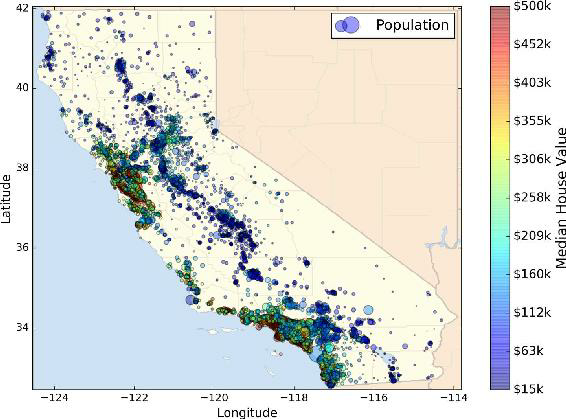

## 1. Look at the Big Picture

Welcome to Machine Learning Housing Corporation! The first task you are asked to perform is to build a model of housing prices in California using the California census data. 

This data has metrics such as:
- the population, 
- median income, 
- median housing price, 
- and so on 

for each block group in California. 

Block groups = the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). We will just call them “districts” for short.

Your model should learn from this data and be able to predict the median housing price in any district, given all the other metrics.

### 1.0. Checklist of a Machine Learning project

This checklist can guide you through your Machine Learning projects. There are eight main steps:

1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
5. Explore many different models and short-list the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.

### 1.1 Frame the Problem

#### Question: What is exactly the business objective?

Your model’s output (a prediction of a district’s median housing price) will be fed to another Machine Learning system, along with many other signals. This downstream system will determine whether it is worth investing in a given area or not. Getting this right is critical, as it directly affects revenue.

A Machine Learning pipeline for real estate investments

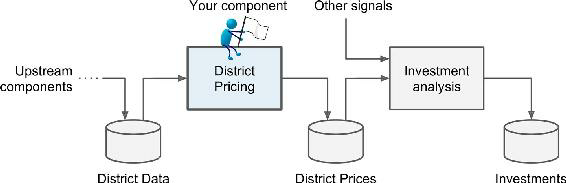

#### Question: What does the current solution looks like?

The next question to ask is what the current solution looks like (if any). It will often give you a reference performance, as well as insights on how to solve the problem. 

Your boss answers that the district housing prices are currently estimated manually by experts: a team gathers up-to-date information about a district (excluding median housing prices), and they use complex rules to come up with an estimate. 

This is costly and time-consuming, and their estimates are not great; their typical error rate is about 15%.

Okay, with all this information you are now ready to start designing your system. First, you need to frame the problem: is it supervised, unsupervised, or Reinforcement Learning? Is it a classification task, a regression task, or something else? Should you use batch learning or online learning techniques? Before you read on, pause and try to answer these questions for yourself.

Have you found the answers? 
- Let’s see: **it is clearly a typical supervised learning task** since you are given labeled training examples (each instance comes with the expected output, i.e., the district’s median housing price). 
- Moreover, it is **also a typical regression task**, since you are asked to predict a value. 
- More specifically, this is a **multivariate regression problem** since the system will use multiple features to make a prediction (it will use the district’s population, the median income, etc.). In the first chapter, you predicted life satisfaction based on just one feature, the GDP per capita, so it was a univariate regression problem. 
- Finally, there is no continuous flow of data coming in the system, there is no particular need to adjust to changing data rapidly, and the data is small enough to fit in memory, so **plain batch learning** should do just fine.

If the data was huge, you could either split your batch learning work across multiple servers (using the MapReduce technique, as we will see later), or you could use an online learning technique instead.

### 1.2 Select a Performance Measure

Your next step is to select a performance measure. 

A *typical performance measure for regression problems* is the **Root Mean Square Error (RMSE)**. 

It measures the standard deviation of the errors the system makes in its predictions. 

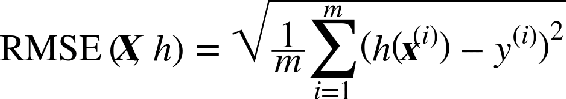

Even though the RMSE is generally the preferred performance measure for regression tasks, in some contexts you may prefer to use another function. For example, suppose that there are many outlier districts. In that case, you may consider using the **Mean Absolute Error** (also called the Average Absolute Deviation)

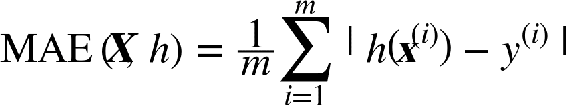

Both the RMSE and the MAE are ways to measure the distance between two vectors: 
- the vector of predictions and 
- the vector of target values. 

Various distance measures, or norms, are possible:

- Computing the root of a sum of squares (RMSE) corresponds to the Euclidian norm: it is the notion of distance you are familiar with. It is also called the ℓ2 norm, noted ∥ · ∥2 (or just ∥ · ∥).
- Computing the sum of absolutes (MAE) corresponds to the ℓ1 norm, noted ∥ · ∥1. It is sometimes called the Manhattan norm because it measures the distance between two points in a city if you can only travel along orthogonal city blocks.
- More generally, the ℓk norm of a vector v containing n elements is defined as . ℓ0 just gives the cardinality of the vector (i.e., the number of elements), and ℓ∞ gives the maximum absolute value in the vector.

The higher the norm index, the more it focuses on large values and neglects small ones. 

This is why **the RMSE is more sensitive to outliers than the MAE**. 

But when outliers are exponentially rare (like in a bell-shaped curve), the RMSE performs very well and is generally preferred.

### 1.3 Check the Assumptions

Lastly, it is good practice to list and verify the assumptions that were made so far (by you or others); this can catch serious issues early on. 

For example, the district prices that your system outputs are going to be fed into a downstream Machine Learning system, and we assume that these prices are going to be used as such. 

But what if the downstream system actually converts the prices into categories (e.g., “cheap,” “medium,” or “expensive”) and then uses those categories instead of the prices themselves? 

In this case, getting the price perfectly right is not important at all; your system just needs to get the category right. 

If that’s so, then the problem should have been framed as a classification task, not a regression task. You don’t want to find this out after working on a regression system for months.

Fortunately, after talking with the team in charge of the downstream system, you are confident that they do indeed need the actual prices, not just categories. Great! You’re all set, the lights are green, and you can start coding now!

## 2. Get the Data

### 2.1. Download the Data

In [4]:
import os
import tarfile
from six.moves import urllib

In [5]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [6]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)

In [7]:
fetch_housing_data()

In [8]:
import pandas as pd

In [9]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

### 2.2. Quick Look at the Data Structure

In [10]:
housing = load_housing_data("D:\Learning\AI - Machine Learning - Deep Learning\Keras-ScikitLearn-Tensorflow\scikit-learn\Chapter_2_End_2_End_ML_Project\datasets\housing")

In [11]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20,640 instances in the dataset, which means that it is fairly small by Machine Learning standards, but it’s perfect to get started. 

**Notice that the total_bedrooms attribute has only 20,433 non-null values, meaning that 207 districts are missing this feature. We will need to take care of this later**.

All attributes are numerical, **except the ocean_proximity field. Its type is object**, so it could hold any kind of Python object, but since you loaded this data from a CSV file you know that it must be a text attribute. 

When you looked at the top five rows, you probably noticed that the values in that column were repetitive, which means that it is probably a categorical attribute. 

You can find out what categories exist and how many districts belong to each category by using the value_counts() method:

In [13]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [15]:
%matplotlib inline # only in a Jupyter Notebook

UsageError: unrecognized arguments: # only in a Jupyter Notebook


In [17]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002300D4098D0>,
      dtype=object)

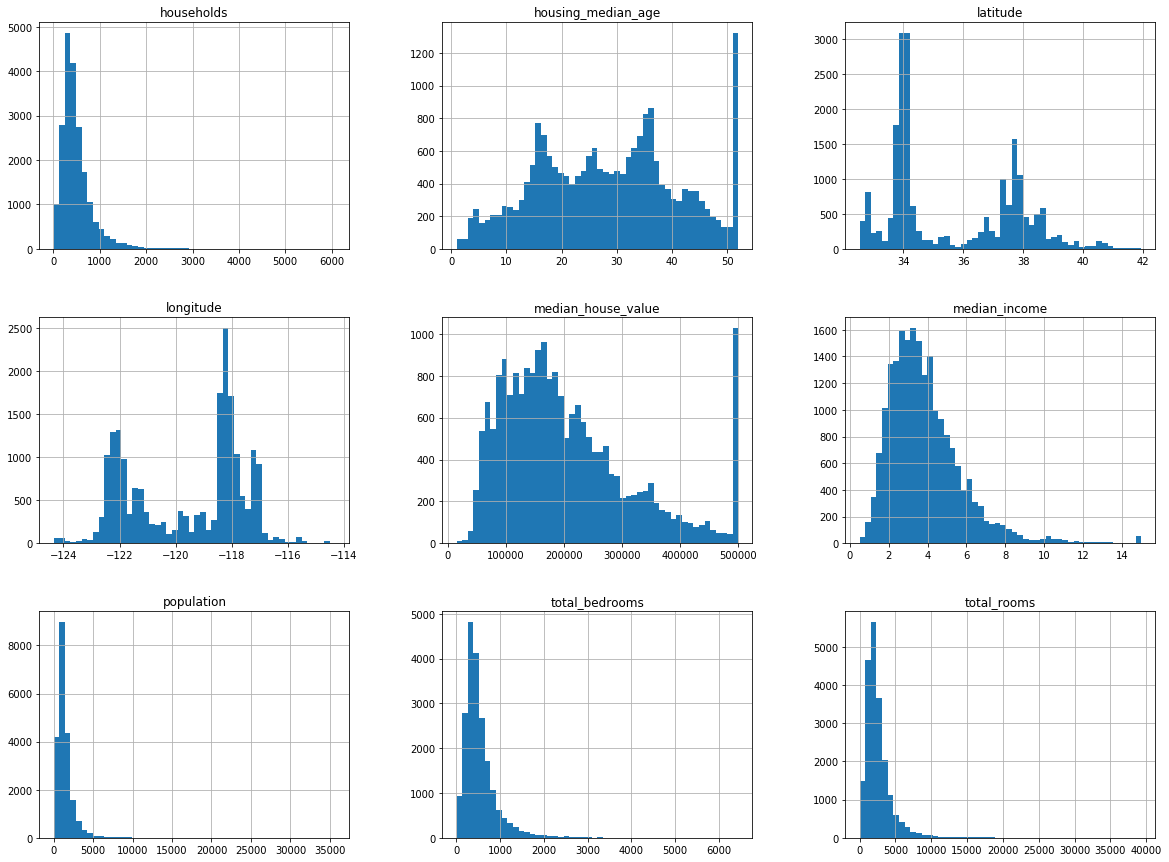

In [18]:
housing.hist(bins=50, figsize=(20, 15))

Notice a few things in these histograms:

1. First, the median income attribute does not look like it is expressed in US dollars (USD). After checking with the team that collected the data, you are told that the data has been scaled and capped at 15 (actually 15.0001) for higher median incomes, and at 0.5 (actually 0.4999) for lower median incomes. Working with preprocessed attributes is common in Machine Learning, and it is not necessarily a problem, but you should try to understand how the data was computed.

2. The housing median age and the median house value were also capped. The latter may be a serious problem since it is your target attribute (your labels). Your Machine Learning algorithms may learn that prices never go beyond that limit. You need to check with your client team (the team that will use your system’s output) to see if this is a problem or not. If they tell you that they need precise predictions even beyond 500,000 USD, then you have mainly two options:
 - Collect proper labels for the districts whose labels were capped.
 - Remove those districts from the training set (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond 500,000 USD).
 
3. These attributes have very different scales. We will discuss this later in this chapter when we explore feature scaling.

4. Finally, many histograms are tail heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

### 2.3 Create a Test Set

In [19]:
import numpy as np

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

Most median income values are clustered around 2–5 (tens of thousands of dollars), but some median incomes go far beyond 6. It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of the stratum’s importance may be biased. 

This means that you should not have too many strata, and each stratum should be large enough. 

The following code:
- creates an income category attribute by dividing the median income by 1.5 (to limit the number of income categories), and 
- rounding up using ceil (to have discrete categories), and then merging all the categories greater than 5 into category 5:

In [22]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)

In [23]:
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

In [24]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

In [26]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

Now you are ready to do stratified sampling based on the income category

In [27]:
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [28]:
for set in (strat_train_set, strat_test_set):
    set.drop(['income_cat'], axis=1, inplace=True)

## 3. Discover and Visualize the Data

Create a copy of training data so we can play with it without harming the training set

In [29]:
housing = strat_train_set.copy()

### 3.1. Visualizing Geographical Data

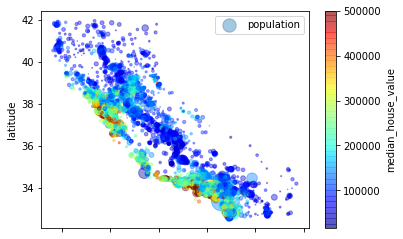

In [30]:
housing.plot(
    kind='scatter', 
    x='longitude', 
    y='latitude', 
    alpha=0.4,
    s=housing['population']/100,
    label='population',
    c='median_house_value',
    cmap=plt.get_cmap('jet'),
    colorbar=True)

This image tells you that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density, as you probably knew already.

It will probably be useful to use a clustering algorithm to detect the main clusters, and add new features that measure the proximity to the cluster centers. 

The ocean proximity attribute may be useful as well, although in Northern California the housing prices in coastal districts are not too high, so it is not a simple rule.

### 3.2. Looking for Correlations

In [31]:
corr_matrix = housing.corr()

In [32]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [33]:
from pandas.tools.plotting import scatter_matrix

In [34]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002300FDB76A0>,
      dtype=object)

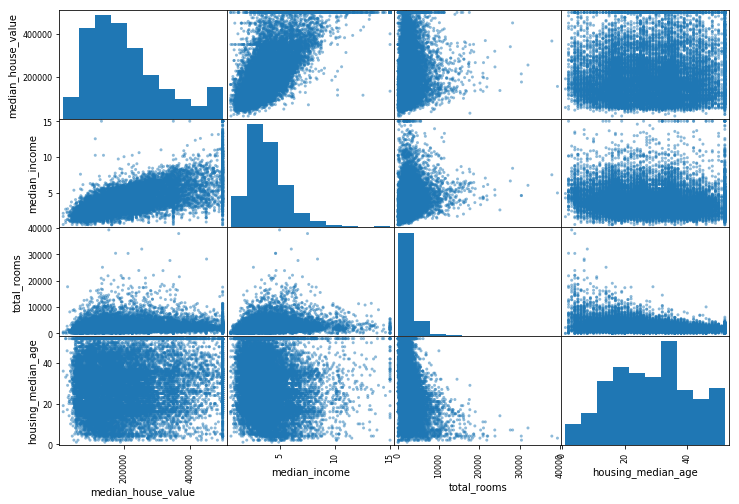

In [35]:
scatter_matrix(housing[attributes], figsize=(12, 8))

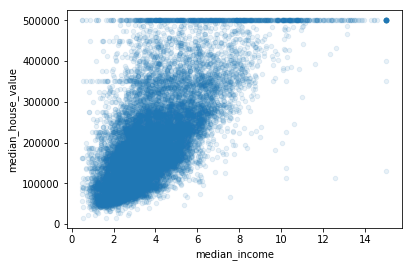

In [36]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

### 3.3. Experimenting with Attribute Combinations

One last thing you may want to do before actually preparing the data for Machine Learning algorithms is to try out various attribute combinations. 

For example, the total number of rooms in a district is not very useful if you don’t know how many households there are. 

What you really want is the number of rooms per household. Similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms. 

And the population per household also seems like an interesting attribute combination to look at.

In [37]:
housing['rooms_per_household'] = housing['total_rooms']/ housing['households']

In [38]:
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']

In [39]:
housing['population_per_household'] = housing['population']/ housing['households']

In [40]:
corr_matrix = housing.corr()

In [41]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

The new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive. 

The number of rooms per household is also more informative than the total number of rooms in a district — obviously the larger the houses, the more expensive they are.

This round of exploration does not have to be absolutely thorough; the point is to start off on the right foot and quickly gain insights that will help you get a first reasonably good prototype. But this is an iterative process: once you get a prototype up and running, you can analyze its output to gain more insights and come back to this exploration step.

## 4. Prepare the Data for Machine Learning 

### 4.1. Data Cleaning

In [42]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_lables = strat_test_set['median_house_value'].copy()

Most Machine Learning algorithms cannot work with missing features, so let’s create a few functions to take care of them. You noticed earlier that the total_bedrooms attribute has some missing values, so let’s fix this. 

You have three options:
1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.).

You can accomplish these easily using DataFrame’s `dropna()`, `drop()`, and `fillna()` methods:

In [43]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')

Since the median can only be computed on numerical attributes, we need to create a copy of the data without the text attribute `ocean_proximity`:

In [44]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [45]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

The imputer has simply computed the median of each attribute and stored the result in its `statistics_` instance variable. Only the `total_bedrooms` attribute had missing values, but we cannot be sure that there won’t be any missing values in new data after the system goes live, so it is safer to apply the imputer to all the numerical attributes:

In [46]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [47]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [48]:
X = imputer.transform(housing_num)

In [49]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

### 4.2. Handling Text and Categorical Attributes

Earlier we left out the categorical attribute `ocean_proximity` because it is a text attribute so we cannot compute its median. Most Machine Learning algorithms prefer to work with numbers anyway, so let’s convert these text labels to numbers.

Scikit-Learn provides a transformer for this task called **LabelEncoder**:

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
encoder = LabelEncoder()

In [52]:
housing_cat = housing['ocean_proximity']

In [53]:
housing_cat_encoded = encoder.fit_transform(housing_cat)

In [54]:
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3], dtype=int64)

In [55]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


Note: 

One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. 

Obviously this is not the case (for example, categories 0 and 4 are more similar than categories 0 and 1). 

To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. 

This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold).

Scikit-Learn provides a OneHotEncoder encoder to convert integer categorical values into one-hot vectors. Let’s encode the categories as one-hot vectors. 

Note that fit_transform() expects a 2D array, but housing_cat_encoded is a 1D array, so we need to reshape it:

In [56]:
from sklearn.preprocessing import OneHotEncoder

In [57]:
encoder = OneHotEncoder()

In [58]:
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))

In [59]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [60]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

We can apply both transformations (from text categories to integer categories, then from integer categories to one-hot vectors) in one shot using the **LabelBinarizer** class:

In [61]:
from sklearn.preprocessing import LabelBinarizer

In [62]:
encoder = LabelBinarizer()

In [63]:
housing_cat_1hot = encoder.fit_transform(housing_cat)

In [64]:
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

Note that this returns a dense NumPy array by default. You can get a sparse matrix instead by passing `sparse_output=True` to the LabelBinarizer constructor.

### 4.3. Custom Transformers

Although Scikit-Learn provides many useful transformers, you will need to write your own for tasks such as custom cleanup operations or combining specific attributes. 

You will want your transformer to work seamlessly with Scikit-Learn functionalities (such as pipelines), and since Scikit-Learn relies on duck typing (not inheritance), all you need is to create a class and implement three methods: 
1. fit() (returning self), 
2. transform(), and 
3. fit_transform(). 

You can get the last one for free by simply adding TransformerMixin as a base class. 

In [79]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [80]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [81]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


### 4.4. Feature Scaling

One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Note that scaling the target values is generally not required.

There are two common ways to get all attributes to have the same scale:
1. min-max scaling and 
2. standardization.

**Min-max scaling** (many people call this normalization) is quite simple: 
- values are shifted and rescaled so that they end up ranging from 0 to 1. - We do this by subtracting the min value and dividing by the max minus the min. 
- Scikit-Learn provides a transformer called MinMaxScaler for this. It has a feature_range hyperparameter that lets you change the range if you don’t want 0–1 for some reason.

**Standardization** is quite different: 
- first it subtracts the mean value (so standardized values always have a zero mean), and 
- then it divides by the variance so that the resulting distribution has unit variance. 
- Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). 
- However, standardization is much less affected by outliers. 
- For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be much affected. 
- Scikit-Learn provides a transformer called StandardScaler for standardization.

**IMPORTANT**:
    
    As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set). Only then can you use them to transform the training set and the test set (and new data).

### 4.5. Transformation Pipelines

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

NameError: name 'SimpleImputer' is not defined

In [74]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [75]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', LabelBinarizer()),
    ])

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

NameError: name 'DataFrameSelector' is not defined

## 5. Select and Train a Model

### 5.1. Training and Evaluating on the Training Set

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(housing)

### 5.2. Better Evaluation Using Cross-Validation

## 6. Fine-Tune Your Model

## 7. Launch, Monitor, and Maintain Your Model

## 8. Try It Out